#  任务1：PyTorch张量计算与Numpy的转换



任务要点：Pytorch基础使用、张量计算

步骤1：配置本地Notebook环境，或使用天池DSW：https://dsw-dev.data.aliyun.com/#/

配置本地环境后，使用pip install jupyter命令安装jupyter notebook

使用jupyter notebook命令打开

![image.png](imgs/jupyter.png)

步骤2：学习Pytorch的基础语法，并成功执行以下代码基础pytorch教程：https://zhuanlan.zhihu.com/p/25572330

官方教程：https://pytorch.org/tutorials/beginner/basics/intro.html

In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
# % matplotlib online
def verify():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Assuming that we are on a CUDA machine, this should print a CUDA device:
    print(device)
verify()

cuda:0


In [2]:
def task1():
    c = np.ones((3, 3))
    d = torch.from_numpy(c)
    print(c)
    print(d)
task1()

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


# 任务2：梯度计算和梯度下降过程


任务要点：Pytorch梯度计算、随机梯度下降

步骤1：学习自动求梯度原理，https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

步骤2：学习随机梯度下降原理，https://www.cnblogs.com/BYRans/p/4700202.html

步骤3：使用numpy创建一个y=10*x+b+noise(0,1)的数据，其中x是0到100的范围，以0.01进行等差数列，使用pytroch定义w和b，并使用随机梯度下降，完成回归拟合。

w, b, loss 0.364170104265213 1.0009701251983643 313693.8125
w, b, loss 3.1033976078033447 1.0420564413070679 160667.03125
w, b, loss 5.063769817352295 1.071459174156189 82290.0703125
w, b, loss 6.466740608215332 1.092500925064087 42147.16015625
w, b, loss 7.470798015594482 1.107559084892273 21586.87109375
w, b, loss 8.189371109008789 1.1183345317840576 11056.298828125
w, b, loss 8.703630447387695 1.1260451078414917 5662.77197265625
w, b, loss 9.071669578552246 1.1315624713897705 2900.3232421875
w, b, loss 9.335058212280273 1.135509729385376 1485.48681640625
w, b, loss 9.523555755615234 1.1383343935012817 760.8389282226562
w, b, loss 9.658459663391113 1.1403543949127197 389.6836242675781
w, b, loss 9.755009651184082 1.1417990922927856 199.5817413330078
w, b, loss 9.824100494384766 1.1428319215774536 102.22477722167969
w, b, loss 9.873550415039062 1.1435703039169312 52.35756301879883
w, b, loss 9.908935546875 1.1440976858139038 26.81974983215332
w, b, loss 9.934261322021484 1.14447426795

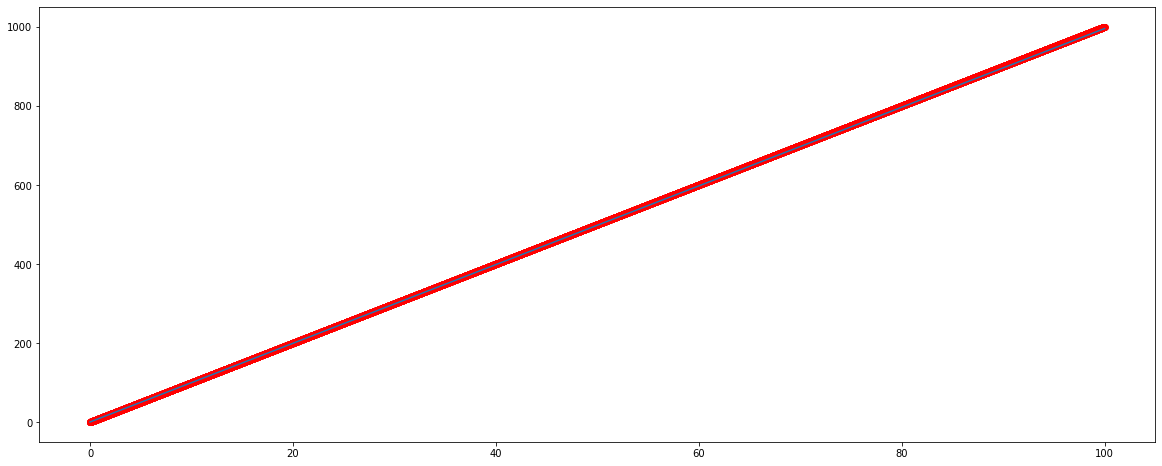

In [3]:
def task2():
    x = torch.linspace(0, 100, 10001)
    noise = torch.randn(1)
    #  y = 10x+1
    y_true = 10 * x + 1 + noise
    # 通过模型计算y_predict
    w = torch.rand([1, 1], requires_grad=True)
    b = torch.tensor(1, requires_grad=True, dtype=torch.float32)
    # 设置学习率
    learing_rate = 1e-6
    # 通过循环，反向传播，更新参数
    for i in range(800):
        # 计算loss
        y_pred = w * x + b
        loss = (y_pred - y_true).pow(2).mean()
        if w.grad is not None:
            w.grad.data.zero_()
        if b.grad is not None:
            b.grad.data.zero_()
        loss.backward()  # 反向传播
        with torch.no_grad():
            w.data = w.data - learing_rate * w.grad.data
            b.data = b.data - learing_rate * b.grad.data
            w.grad=None
            b.grad=None
        if i % 50 == 0:
            print("w, b, loss", w.item(), b.item(), loss.item())

    print(f'Result: y = {w.item()} x + {b.item()}')
    plt.figure(figsize=(20, 8))
    plt.scatter(x, y_true, c='r')
    y_pred = w * x + b
    plt.plot(x.numpy().reshape(-1), y_pred.detach().numpy().reshape(-1))
    plt.show()
task2()

# 任务3：PyTorch全连接层原理和使用


任务要点：全连接网络

步骤1：学习全连接网络原理，https://blog.csdn.net/xiaodong_11/article/details/82015456

步骤2：在pytorch中使用矩阵乘法实现全连接层

步骤3：在pytorch中使用nn.Linear层

In [4]:
def task3():
    # 使用numpy定义全连接层
    class Liner():
        def __init__(self, in_features, out_features, bias=0):
            self.in_features = in_features
            self.out_features = out_features
            self.weight = np.zeros((in_features, out_features))
            self.bias = np.zeros((in_features, out_features))

        def forward(self, x):
            return np.dot(x, self.weight.T) + self.bias

    # 使用pytorch的全连接层
    m = torch.nn.Linear(20, 30)
    input = torch.randn(128, 20)
    output = m(input)
    print(output.size())
task3()

torch.Size([128, 30])


# 任务4：PyTorch激活函数原理和使用


任务要点：激活函数

步骤1：学习激活函数的原理，https://zhuanlan.zhihu.com/p/88429934
https://pytorch.org/docs/stable/_images/ELU.png

步骤2：在pytorch中手动实现上述激活函数

ELU激活函数
![ELU](https://pytorch.org/docs/stable/_images/ELU.png)

### 自己定义
```
def elu(x,alpha=1.0,inplace=False):
    return max(0,x)+min(0,alpha∗(exp(x)−1))
```

In [6]:
# 使用pytorch自带
def task4():
    # https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
    # https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU
    m = torch.nn.ELU()
    input = torch.randn(2)
    output = m(input)
    print(output)
task4()

tensor([1.7331, 0.2809])


# 任务5：PyTorch卷积层原理和使用

In [ ]:
任务要点：卷积层
步骤1：理解卷积层的原理和具体使用
https://blog.csdn.net/qq_37385726/article/details/81739179https://www.cnblogs.com/zhangxiann/p/13584415.html

- 卷积层主要使用的有3类，用于处理不同维度的数据
参数 Parameters：
in_channels(int) – 输入信号的通道   
out_channels(int) – 卷积产生的通道
kerner_size(int or tuple) - 卷积核的尺寸
stride(int or tuple, optional) - 卷积步长
padding (int or tuple, optional)- 输入的每一条边补充0的层数   
dilation(int or tuple, `optional``) – 卷积核元素之间的间距
groups(int, optional) – 从输入通道到输出通道的阻塞连接数
bias(bool, optional) - 如果bias=True，添加偏置

步骤2：计算下如下卷积层的参数量
```python
nn.Conv2d(            
    in_channels=1,            
    out_channels=32,            
    kernel_size=5,            
    stride=1,            
    padding=2        
)
```
参数量：5*5*1*32 +32=832

# 任务6：PyTorch常见的损失函数和优化器使用

任务要点：损失函数、优化器

步骤1：学习损失函数的细节，https://www.cnblogs.com/wanghui-garcia/p/10862733.html

步骤2：学习优化器的使用，https://pytorch.org/docs/stable/optim.htm
l步骤3：设置不同的优化器和学习率，重复任务2的回归过程
- 损失函数MSE、优化器SGD、学习率0.1
- 损失函数MSE、优化器SGD、学习率0.5
- 损失函数MSE、优化器SGD、学习率0.01

In [7]:
# -*- coding: utf-8 -*-
import torch
import math

print("损失函数MSE、优化器SGD、学习率0.1")
class Net(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a * x + self.b

    def string(self):
        return f'y = {self.a.item()}x + {self.b.item()}'


# Create Tensors to hold input and outputs.
x = torch.arange(0, 100, 0.01,dtype=torch.float32)
noise = torch.randn(1)
#  y = 10x+1
y = 10 * x + 1 + noise
# Construct our model by instantiating the class defined above
model = Net()
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for t in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    # Compute and print loss
    loss = 0.0001*criterion(y_pred, y)
    #if t % 100 == 99:
    #     print(t, loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

损失函数MSE、优化器SGD、学习率0.1
Result: y = 10.00599193572998x + -0.9417966604232788


In [8]:
# -*- coding: utf-8 -*-
import torch
import math

print("损失函数MSE、优化器SGD、学习率0.5")
class Net(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a * x + self.b

    def string(self):
        return f'y = {self.a.item()}x + {self.b.item()}'


# Create Tensors to hold input and outputs.
x = torch.arange(0, 100, 0.01,dtype=torch.float32)
noise = torch.randn(1)
#  y = 10x+1
y = 10 * x + 1 + noise
# Construct our model by instantiating the class defined above
model = Net()
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
for t in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    # Compute and print loss
    loss = 0.0001*criterion(y_pred, y)
    #if t % 100 == 99:
    #     print(t, loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

损失函数MSE、优化器SGD、学习率0.5
Result: y = 10.01236629486084x + -0.5685523152351379


In [9]:
# -*- coding: utf-8 -*-
import torch
import math

print("损失函数MSE、优化器SGD、学习率0.01")
class Net(torch.nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))

    def forward(self, x):
        return self.a*x + self.b

    def string(self):
        return f'y = {self.a.item()}x + {self.b.item()}'


# Create Tensors to hold input and outputs.
x = torch.arange(0, 100, 0.01)
noise = torch.randn(1)
y = 10 * x + 1 + noise
# Construct our model by instantiating the class defined above
model = Net()
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters (defined
# with torch.nn.Parameter) which are members of the model.
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for t in range(100):
    y_pred = model(x)
    loss = 0.0001*criterion(y_pred, y)
    #if t % 100 == 99:
    #     print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'Result: {model.string()}')

损失函数MSE、优化器SGD、学习率0.01
Result: y = 4.89714241027832x + 0.09823014587163925


# 任务7：PyTorch池化层和归一化层 

任务要点：池化层、归一化层

步骤1：使用pytroch代码实现2d pool中的mean-pooling、max-pooling
- https://pytorch.org/docs/stable/nn.html#pooling-layers
- https://blog.csdn.net/shanglianlm/article/details/85313924

池化层的作用：(1) 降低信息冗余；(2) 提升模型的尺度不变性、旋转不变性；(3) 防止过拟合。

池化层的常见操作包含以下几种：最大值池化，均值池化，随机池化，中值池化，组合池化等。

- 均值池化
```
torch.nn.AvgPool1d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
torch.nn.AvgPool3d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
```

- 最大值池化
```
torch.nn.MaxPool1d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
torch.nn.MaxPool3d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```


步骤2：学习归一化的原理，https://blog.csdn.net/qq_23981335/article/details/106572171

batchNorm是在batch上，对小batchsize效果不好；
layerNorm在通道方向上，主要对RNN作用明显；
instanceNorm在图像像素上，用在风格化迁移；
GroupNorm将channel分组，然后再做归一化, 在batchsize<16的时候, 可以使用这种归一化。

# 任务8：使用PyTorch搭建VGG网络

任务要点：网络搭建
https://zhuanlan.zhihu.com/p/263527295

步骤1：理解VGG网络的原理。

VGG的思路就是利用多个小尺寸的卷积核串联代替之前网络的大尺寸卷积核，在保持感受野不下降的前提下，减少网络的参数。虽然VGG提出较早，但它仍用在计算机视觉的各个领域内，常被作为骨架网络的一部分；VGG的利用小尺寸卷积核的思路也是后续很多优秀网络结构的原始启发。

步骤2：使用pytorch搭建VGG网络模型。

步骤3：打印出VGG 11层模型 每层特征图的尺寸，以及参数量。

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class VGG(nn.Module):
    """
    VGG builder
    """
    def __init__(self, arch: object, num_classes=1000) -> object:
        super(VGG, self).__init__()
        self.in_channels = 3
        self.conv3_64 = self.__make_layer(64, arch[0])
        self.conv3_128 = self.__make_layer(128, arch[1])
        self.conv3_256 = self.__make_layer(256, arch[2])
        self.conv3_512a = self.__make_layer(512, arch[3])
        self.conv3_512b = self.__make_layer(512, arch[4])
        self.fc1 = nn.Linear(7*7*512, 4096)
        self.bn1 = nn.BatchNorm1d(4096)
        self.bn2 = nn.BatchNorm1d(4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def __make_layer(self, channels, num):
        layers = []
        for i in range(num):
            layers.append(nn.Conv2d(self.in_channels, channels, 3, stride=1, padding=1, bias=False))  # same padding
            layers.append(nn.BatchNorm2d(channels))
            layers.append(nn.ReLU())
            self.in_channels = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv3_64(x)
        out = F.max_pool2d(out, 2)
        out = self.conv3_128(out)
        out = F.max_pool2d(out, 2)
        out = self.conv3_256(out)
        out = F.max_pool2d(out, 2)
        out = self.conv3_512a(out)
        out = F.max_pool2d(out, 2)
        out = self.conv3_512b(out)
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.bn1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = F.relu(out)
        return F.softmax(self.fc3(out))
def VGG_11():
    return VGG([1, 1, 2, 2, 2], num_classes=1000)

def VGG_13():
    return VGG([1, 1, 2, 2, 2], num_classes=1000)

def VGG_16():
    return VGG([2, 2, 3, 3, 3], num_classes=1000)

def VGG_19():
    return VGG([2, 2, 4, 4, 4], num_classes=1000)

def test():
    # net = VGG_11()
    # net = VGG_13()
    # net = VGG_16()
    net = VGG_19()
    print(net, (3, 224, 224))
test()

VGG(
  (conv3_64): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (conv3_128): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (conv3_256): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=

# 任务9：使用PyTorch搭建ResNet网络


任务要点：网络搭建
https://zhuanlan.zhihu.com/p/263526658
    
步骤1：理解ResNet网络的原理。

核心思想是：训练残差，传统cnn卷积层可以将y = F（w, x) 看做目标函数，而resnet可以的目标函数可视为 y = F (w, x) + x；凯明大神发现训练残差相比传统的结构，可以使得网络可以做得更深，更容易训练，并且减缓过拟合现象。

步骤2：使用pytorch搭建ResNet网络模型。

步骤3：打印出ResNet 18模型 每层特征图的尺寸，以及参数量。


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class BN_Conv2d(nn.Module):
    """
    BN_CONV, default activation is ReLU
    """

    def __init__(self, in_channels: object, out_channels: object, kernel_size: object, stride: object, padding: object,
                 dilation=1, groups=1, bias=False, activation=True) -> object:
        super(BN_Conv2d, self).__init__()
        layers = [nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride,
                            padding=padding, dilation=dilation, groups=groups, bias=bias),
                  nn.BatchNorm2d(out_channels)]
        if activation:
            layers.append(nn.ReLU(inplace=True))
        self.seq = nn.Sequential(*layers)

    def forward(self, x):
        return self.seq(x)
    
class BasicBlock(nn.Module):
    """
    basic building block for ResNet-18, ResNet-34
    """
    message = "basic"

    def __init__(self, in_channels, out_channels, strides, is_se=False):
        super(BasicBlock, self).__init__()
        self.is_se = is_se
        self.conv1 = BN_Conv2d(in_channels, out_channels, 3, stride=strides, padding=1, bias=False)  # same padding
        self.conv2 = BN_Conv2d(out_channels, out_channels, 3, stride=1, padding=1, bias=False, activation=False)
        if self.is_se:
            self.se = SE(out_channels, 16)

        # fit input with residual output
        self.short_cut = nn.Sequential()
        if strides != 1:
            self.short_cut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, 1, stride=strides, padding=0, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        if self.is_se:
            coefficient = self.se(out)
            out = out * coefficient
        out = out + self.short_cut(x)
        return F.relu(out)
class BottleNeck(nn.Module):
    """
    BottleNeck block for RestNet-50, ResNet-101, ResNet-152
    """
    message = "bottleneck"

    def __init__(self, in_channels, out_channels, strides, is_se=False):
        super(BottleNeck, self).__init__()
        self.is_se = is_se
        self.conv1 = BN_Conv2d(in_channels, out_channels, 1, stride=1, padding=0, bias=False)  # same padding
        self.conv2 = BN_Conv2d(out_channels, out_channels, 3, stride=strides, padding=1, bias=False)
        self.conv3 = BN_Conv2d(out_channels, out_channels * 4, 1, stride=1, padding=0, bias=False, activation=False)
        if self.is_se:
            self.se = SE(out_channels * 4, 16)

        # fit input with residual output
        self.shortcut = nn.Sequential(
            nn.Conv2d(in_channels, out_channels * 4, 1, stride=strides, padding=0, bias=False),
            nn.BatchNorm2d(out_channels * 4)
        )

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        if self.is_se:
            coefficient = self.se(out)
            out = out * coefficient
        out = out + self.shortcut(x)
        return F.relu(out)
    
class ResNet(nn.Module):
    """
    building ResNet_34
    """

    def __init__(self, block: object, groups: object, num_classes=1000) -> object:
        super(ResNet, self).__init__()
        self.channels = 64  # out channels from the first convolutional layer
        self.block = block
        self.conv1 = nn.Conv2d(3, self.channels, 7, stride=2, padding=3, bias=False)
        self.bn = nn.BatchNorm2d(self.channels)
        self.pool1 = nn.MaxPool2d(3, 2, 1)
        self.conv2_x = self._make_conv_x(channels=64, blocks=groups[0], strides=1, index=2)
        self.conv3_x = self._make_conv_x(channels=128, blocks=groups[1], strides=2, index=3)
        self.conv4_x = self._make_conv_x(channels=256, blocks=groups[2], strides=2, index=4)
        self.conv5_x = self._make_conv_x(channels=512, blocks=groups[3], strides=2, index=5)
        self.pool2 = nn.AvgPool2d(7)
        patches = 512 if self.block.message == "basic" else 512 * 4
        self.fc = nn.Linear(patches, num_classes)  # for 224 * 224 input size

    def _make_conv_x(self, channels, blocks, strides, index):
        """
        making convolutional group
        :param channels: output channels of the conv-group
        :param blocks: number of blocks in the conv-group
        :param strides: strides
        :return: conv-group
        """
        list_strides = [strides] + [1] * (blocks - 1)  # In conv_x groups, the first strides is 2, the others are ones.
        conv_x = nn.Sequential()
        for i in range(len(list_strides)):
            layer_name = str("block_%d_%d" % (index, i))  # when use add_module, the name should be difference.
            conv_x.add_module(layer_name, self.block(self.channels, channels, list_strides[i]))
            self.channels = channels if self.block.message == "basic" else channels * 4
        return conv_x

    def forward(self, x):
        out = self.conv1(x)
        out = F.relu(self.bn(out))
        out = self.pool1(out)
        out = self.conv2_x(out)
        out = self.conv3_x(out)
        out = self.conv4_x(out)
        out = self.conv5_x(out)
        out = self.pool2(out)
        out = out.view(out.size(0), -1)
        out = F.softmax(self.fc(out))
        return out
    
def ResNet_18(num_classes=1000):
    return ResNet(block=BasicBlock, groups=[2, 2, 2, 2], num_classes=num_classes)

def ResNet_34(num_classes=1000):
    return ResNet(block=BasicBlock, groups=[3, 4, 6, 3], num_classes=num_classes)

def ResNet_50(num_classes=1000):
    return ResNet(block=BottleNeck, groups=[3, 4, 6, 3], num_classes=num_classes)

def ResNet_101(num_classes=1000):
    return ResNet(block=BottleNeck, groups=[3, 4, 23, 3], num_classes=num_classes)

def ResNet_152(num_classes=1000):
    return ResNet(block=BottleNeck, groups=[3, 8, 36, 3], num_classes=num_classes)

def test():
    # net = ResNet_18()
    # net = ResNet_34()
    # net = ResNet_50()
    # net = ResNet_101()
    net = ResNet_152()
    print(net, (3, 224, 224))
test()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2_x): Sequential(
    (block_2_0): BottleNeck(
      (conv1): BN_Conv2d(
        (seq): Sequential(
          (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
      )
      (conv2): BN_Conv2d(
        (seq): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
      )
      (conv3): BN_Conv2d(
        (seq): Sequential(
          (0): Conv2d(64, 256, kernel_size=(1, 1), st

# 任务10：使用PyTorch完成Fashion-MNIST分类

https://github.com/masoudrostami/Fashion-MNIST-using-PyTorch/blob/main/MNIST%20Fashion%20Project.ipynb
步骤1：搭建4层卷积 + 2层全连接的分类模型。
步骤2：在训练过程中记录下每个epoch的训练集精度和测试集精度。

In [12]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn, optim # optim here allow us to get optimizers
from torchvision import datasets, transforms
import torchvision
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F # let us to use ReLU and log softmax
from sklearn.metrics import confusion_matrix

device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(torch. __version__)

%matplotlib inline

1.10.0+cu113


In [13]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [14]:
# Download and load the training data
trainset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)

# Download and load the test data
testset = torchvision.datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

In [15]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=20, shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=20, shuffle=True)

In [16]:
##   Different  classes in Fashion MNIST dataset

classes=('Tshirt', 'Trouser','Pullover', 'Dress', 'Coat',
        'Sandal','Shirt', 'Sneaker','Bag', 'Anke boot' )

In [17]:
## We can use helper function to see some images of MNIST fashion

def matplotlib_imshow (img, one_channel=False):
    if one_channel:
        img=img.mean(dim=0)
    img=img/2+0.5 # unnormalize
    npimg=img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1,2,0)))

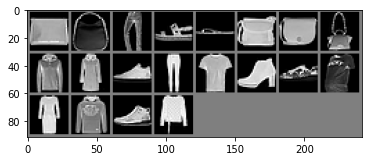

In [18]:
## Now lets try to get some random images

d=iter(trainloader)
images, labels=d.next()
matplotlib_imshow(torchvision.utils.make_grid(images))

In [19]:

mnist=next(iter(trainloader))
mnist[0].size()

torch.Size([20, 1, 28, 28])

In [20]:
len(trainset)

60000

In [21]:
len(testset)

10000

9


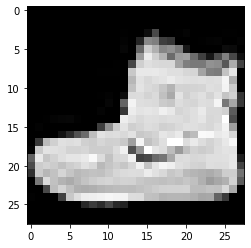

In [22]:
## or we can use this method
image, label=next(iter(trainset))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

9


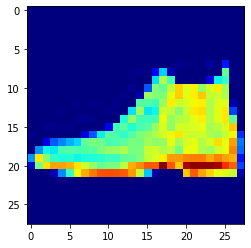

In [23]:
# or we can use this method
image, label=next(iter(testset))
plt.imshow(image.squeeze(), cmap="jet")
print(label)

In [24]:
class Fashion(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Linear(784, 256)
        self.c2 = nn.Linear(256, 128)
        self.c3 = nn.Linear(128, 64)
        self.c4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.c1(x))
        x = F.relu(self.c2(x))
        x = F.relu(self.c3(x))
        x = F.log_softmax(self.c4(x), dim=1)
        
        return x

In [25]:

model = Fashion()

error = nn.NLLLoss() #define a metric for our loss function

learning_rate=0.001 # Defining the learning rate

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
model.c1.weight

Parameter containing:
tensor([[ 0.0313,  0.0159, -0.0281,  ..., -0.0189, -0.0339, -0.0128],
        [ 0.0061,  0.0240, -0.0077,  ..., -0.0166, -0.0165, -0.0060],
        [-0.0019, -0.0099, -0.0231,  ..., -0.0220, -0.0287,  0.0239],
        ...,
        [-0.0141, -0.0310,  0.0147,  ...,  0.0076,  0.0086, -0.0292],
        [-0.0112,  0.0049, -0.0137,  ...,  0.0069, -0.0007, -0.0310],
        [ 0.0327, -0.0067, -0.0235,  ..., -0.0314,  0.0168,  0.0248]],
       requires_grad=True)

In [27]:
model.c4.weight

Parameter containing:
tensor([[-0.0163, -0.0663,  0.0823, -0.0972,  0.0263,  0.1193,  0.1236,  0.0956,
         -0.0066,  0.1155, -0.0957, -0.1230,  0.0407,  0.0141,  0.0104,  0.0761,
         -0.0167, -0.0888, -0.0515, -0.0020,  0.0492,  0.1039, -0.0243,  0.1023,
          0.0829,  0.0908,  0.0557, -0.0366, -0.0358, -0.1046,  0.1082, -0.0460,
          0.1164,  0.0141, -0.1232,  0.0445,  0.0491,  0.0118, -0.0250, -0.0902,
         -0.0019,  0.0963,  0.1153, -0.1138, -0.0808, -0.0827,  0.0833,  0.0456,
         -0.1208,  0.1180, -0.1062,  0.0782, -0.1086, -0.0533, -0.0453, -0.0415,
          0.0664,  0.0445, -0.0258, -0.0651,  0.0388,  0.1107,  0.0673,  0.0225],
        [ 0.0831, -0.1235, -0.0911,  0.0325, -0.1132, -0.0495, -0.0326,  0.1146,
         -0.1095,  0.1096,  0.0003,  0.0782,  0.0929, -0.0664,  0.0788,  0.0069,
          0.0246,  0.1023,  0.0687,  0.0218,  0.0767,  0.0591,  0.0827, -0.0757,
         -0.0930,  0.0681, -0.0225, -0.0848,  0.0877, -0.0748, -0.1122,  0.0672,
     

In [28]:
num_epochs = 50

for e in range(num_epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = error(log_ps, labels)
        
        optimizer.zero_grad() # Zeroing our gradients
        loss.backward() # Taking  backward pass
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}", end=" ")
        
    model.eval()
    with torch.no_grad():
        total=0
        correct=0
        for images,labels in testloader:
            log_ps=model(images)
            mx_index=torch.argmax(log_ps,dim=1)
            total+=labels.numel()
            correct+=sum(mx_index==labels).item()
        print(f"Test Accuracy {correct/total*100:.2f}")

Training loss: 0.4977193564126889 Test Accuracy 83.09
Training loss: 0.3783393273170417 Test Accuracy 86.00
Training loss: 0.34022092275631927 Test Accuracy 87.12
Training loss: 0.3146120495417466 Test Accuracy 86.85
Training loss: 0.2966605308490495 Test Accuracy 87.19
Training loss: 0.28123329413682224 Test Accuracy 87.36
Training loss: 0.26845359115271517 Test Accuracy 88.08
Training loss: 0.25939160228613767 Test Accuracy 88.11
Training loss: 0.24770301393658156 Test Accuracy 88.60
Training loss: 0.24085928081472716 Test Accuracy 88.72
Training loss: 0.2309898076625541 Test Accuracy 87.92
Training loss: 0.22389898841983327 Test Accuracy 87.52
Training loss: 0.21687904575568004 Test Accuracy 88.64
Training loss: 0.2081099520609714 Test Accuracy 88.97
Training loss: 0.2058708205836204 Test Accuracy 88.35
Training loss: 0.20126192000407414 Test Accuracy 88.19
Training loss: 0.19666111113969237 Test Accuracy 87.98
Training loss: 0.18796381203900092 Test Accuracy 88.57
Training loss: 0.

Text(0.5, 1.0, 'tensor([[8.1289e-03, 1.2110e-04, 1.5874e-03, 3.0093e-02, 2.9959e-05, 5.2984e-16,\n         9.6002e-01, 3.3685e-28, 1.9487e-05, 3.6631e-31]],\n       grad_fn=<ExpBackward0>)')

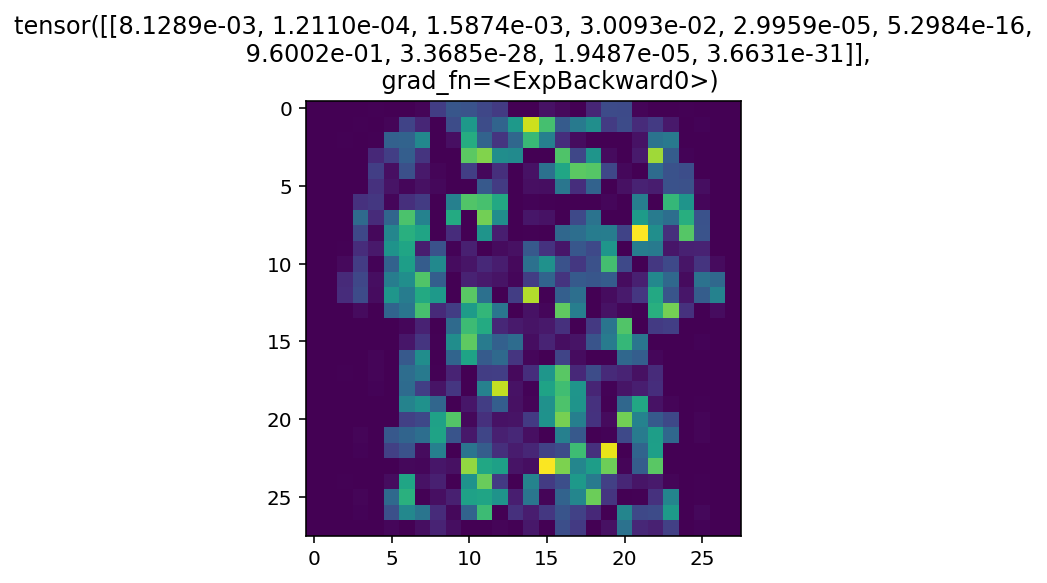

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

#  Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))
# Plot the image and probabilities
plt.imshow(img.squeeze())
plt.title(str(ps))

# 任务11：使用PyTorch完成人脸关键点检测

数据集：https://ai-contest-static.xfyun.cn/2021/7afa865e-5ac8-48ab-9966-d88bb33cdc15/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B_%E6%95%B0%E6%8D%AE%E9%9B%86.zip

https://gitee.com/coggle/competition-baseline/blob/master/competition/%E7%A7%91%E5%A4%A7%E8%AE%AF%E9%A3%9EAI%E5%BC%80%E5%8F%91%E8%80%85%E5%A4%A7%E8%B5%9B2021/%E4%BA%BA%E8%84%B8%E5%85%B3%E9%94%AE%E7%82%B9%E6%A3%80%E6%B5%8B%E6%8C%91%E6%88%98%E8%B5%9B/face-keypoint2.ipynb

步骤1：搭建4层卷积 + 2层的模型完成关键点回归。

步骤2：使用resnet18预训练模型完成关键点回归。

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [40]:
train_df = pd.read_csv('人脸关键点检测挑战赛_数据集/train.csv')
train_df = train_df.fillna(48)
train_df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.342364,38.523613,28.930840,35.577773,49.256845,68.275955,47.783946,85.361582
1,68.912604,31.409117,29.652226,33.028075,51.913358,48.408453,50.698868,79.574038
2,68.708994,40.371149,27.130820,40.940680,44.502523,69.988486,45.926427,86.221009
3,65.334176,35.471878,29.366461,37.767684,50.411373,64.934767,50.028780,74.883241
4,68.634857,29.999486,31.094571,29.616429,50.247429,51.450857,47.948571,84.394286


In [41]:
train_img = np.load('人脸关键点检测挑战赛_数据集/train.npy')
test_img = np.load('人脸关键点检测挑战赛_数据集/test.npy')

print(train_img.shape, test_img.shape)

(96, 96, 5000) (96, 96, 2049)


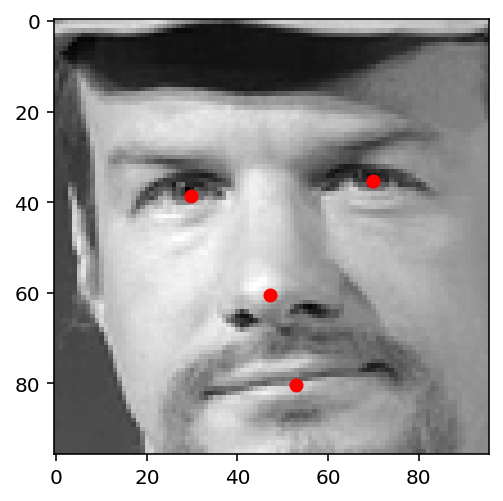

In [42]:
%matplotlib inline
idx = 409
xy = train_df.iloc[idx].values.reshape(-1, 2)
plt.scatter(xy[:, 0], xy[:, 1], c='r')
plt.imshow(train_img[:, :, idx], cmap='gray')

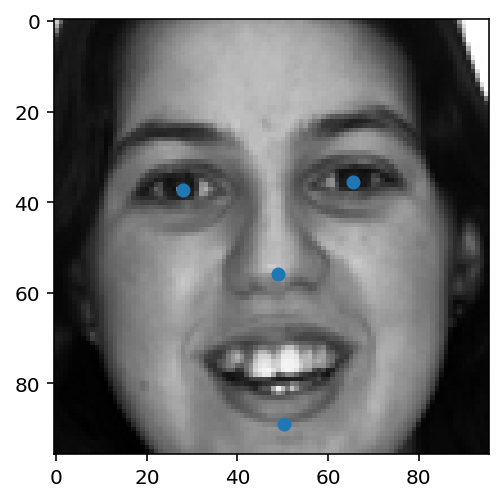

In [43]:
idx = 400
xy = train_df.iloc[idx].values.reshape(-1, 2)
plt.scatter(xy[:, 0], xy[:, 1])
plt.imshow(train_img[:, :, idx], cmap='gray')

In [44]:
import os, sys, codecs, glob
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import cv2

import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset

In [45]:
class XunFeiDataset(Dataset):
    def __init__(self, img, keypoint, transform=None):
        self.img = img
        self.transform = transform
        self.keypoint = keypoint

    def __getitem__(self, index):
        img = Image.fromarray(self.img[:, :, index]).convert('RGB')
        
        if self.transform is not None:
            img = self.transform(img)
        
        return img, self.keypoint[index] / 96.0

    def __len__(self):
        return self.img.shape[-1]

In [46]:
train_loader = torch.utils.data.DataLoader(
    XunFeiDataset(train_img[:, :, :-500], train_df.values[:-500],
                    transforms.Compose([
                        transforms.ToTensor(),
        ])
    ),
    batch_size=10, shuffle=True, 
)

val_loader = torch.utils.data.DataLoader(
    XunFeiDataset(train_img[:, :, -500:], train_df.values[-500:],
                    transforms.Compose([
                        transforms.ToTensor(),
        ])
    ),
    batch_size=10, shuffle=False,
)

In [47]:
train_img[:, :, -500:].shape

(96, 96, 500)

In [48]:
import timm

class XunFeiNet(nn.Module):
    def __init__(self):
        super(XunFeiNet, self).__init__()
        self.model = timm.create_model('efficientnet_b2', num_classes=8, 
                          pretrained=True)
        
    def forward(self, img, labels=None):        
        feat = self.model(img)
        return feat
    
model = XunFeiNet().cuda()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b2_ra-bcdf34b7.pth" to C:\Users\lei/.cache\torch\hub\checkpoints\efficientnet_b2_ra-bcdf34b7.pth


In [49]:
def train(train_loader, model, criterion, optimizer, epoch):
    model.train()

    for i, (input, target) in enumerate(train_loader):
        input = input.cuda(non_blocking=True).float()
        target = target.cuda(non_blocking=True).float()

        output = model(input, target)
        loss = criterion(output, target)
        optimizer.zero_grad()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        loss.backward()
        optimizer.step()
        
        if i % 200 == 0:
            print(loss.item())
            
def validate(val_loader, model):
    model.eval()
    
    val_feats = []
    with torch.no_grad():
        end = time.time()
        for i, (input, target) in enumerate(val_loader):
            input = input.cuda().float()
            target = target.cuda().float()
            output = model(input)
            val_feats.append(output.data.cpu().numpy())
    return val_feats

In [50]:
from sklearn.metrics import mean_absolute_error

criterion = nn.MSELoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), 0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.85)
best_acc = 0.0

for epoch in range(5):
    print('Epoch: ', epoch)

    train(train_loader, model, criterion, optimizer, epoch)
    
    val_feats = validate(val_loader, model)
    scheduler.step()
    
    val_feats = np.vstack(val_feats) * 96
    print('Val', mean_absolute_error(val_feats, train_df.values[-500:]))

Epoch:  0
8.388799667358398
0.05536365509033203
0.016571002081036568
Val 18.626160109941946
Epoch:  1
0.021795565262436867
0.007449681404978037
0.013387948274612427
Val 7.621369589306628
Epoch:  2
0.008371229283511639
0.004364487715065479
0.003214385127648711
Val 6.835417949299242
Epoch:  3
0.005481815431267023
0.004269659053534269
0.0031937675084918737
Val 5.449259480833355
Epoch:  4
0.0035911034792661667
0.002366273198276758
0.0019169672159478068
Val 4.843931746507942


In [51]:
test_loader = torch.utils.data.DataLoader(
    XunFeiDataset(test_img, np.zeros((2049, 8)),
                    transforms.Compose([
                        transforms.ToTensor(),
        ])
    ),
    batch_size=10, shuffle=False
)

In [53]:
pred_tta = []
for tti in range(1):
    pred = []
    with torch.no_grad():
        for t, (x, y) in enumerate(test_loader):
            x_var = Variable(x).cuda()
            y_var = Variable(y).cuda()
            scores = model(x_var)
            pred.append(scores.data.cpu().numpy())
    pred = np.concatenate(pred, 0)    
    print(tti)
    pred_tta.append(pred)

pred = np.mean(pred_tta, axis=0)

0


In [54]:
col = ['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
 'right_eye_center_y', 'nose_tip_x', 'nose_tip_y', 
 'mouth_center_bottom_lip_x','mouth_center_bottom_lip_y']
pd.DataFrame(pred * 96, columns=col).to_csv('submit.csv', index=None)

# 任务12：使用PyTorch搭建对抗生成网络

步骤1：学习对抗生成网络的原理，https://blog.csdn.net/DFCED/article/details/105175097
    
步骤2：学习DCGAN的代码实现，https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
    
步骤3：使用任务11中的人脸数据（缩放至64*64），并使用DCGAN完成训练，生成人脸。

In [1]:
from __future__ import print_function
#%matplotlib inline
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from torch.utils.data.dataset import Dataset
from PIL import Image, ImageDraw
# Set random seed for reproducibility
manualSeed = 999
#manualSeed = random.randint(1, 10000) # use if you want new results
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  999


In [2]:
# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 128

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

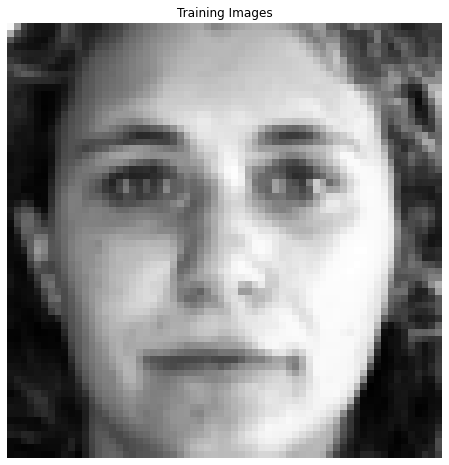

In [30]:
train_img = np.load('人脸关键点检测挑战赛_数据集/train.npy')
test_img = np.load('人脸关键点检测挑战赛_数据集/test.npy')
class XunFeiDataset(Dataset):
    def __init__(self, img, transform=None):
        self.img = img
        self.transform = transform

    def __getitem__(self, index):
        img = Image.fromarray(self.img[:, :, index]).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        return img

    def __len__(self):
        return self.img.shape[-1]

# Create the dataloader
dataloader = torch.utils.data.DataLoader(
    XunFeiDataset(train_img[:, :, :-500], transforms.Compose([                              
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])),
    batch_size=batch_size, shuffle=True,
)



# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [31]:
# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [24]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # state size. (ngf*8) x 4 x 4
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # state size. (ngf*4) x 8 x 8
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. (ngf*2) x 16 x 16
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. (ngf) x 32 x 32
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. (nc) x 64 x 64
        )

    def forward(self, input):
        return self.main(input)

In [25]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.02.
netG.apply(weights_init)

# Print the model
print(netG)

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [33]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is (nc) x 64 x 64
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf) x 32 x 32
            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*2) x 16 x 16
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*4) x 8 x 8
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. (ndf*8) x 4 x 4
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [34]:
# Create the Discriminator
netD = Discriminator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

# Apply the weights_init function to randomly initialize all weights
#  to mean=0, stdev=0.2.
netD.apply(weights_init)

# Print the model
print(netD)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)


In [35]:
# Initialize BCELoss function
criterion = nn.BCELoss()

# Create batch of latent vectors that we will use to visualize
#  the progression of the generator
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Establish convention for real and fake labels during training
real_label = 1.
fake_label = 0.

# Setup Adam optimizers for both G and D
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [36]:
# Training Loop

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        # Forward pass real batch through D
        output = netD(real_cpu).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        # Generate fake image batch with G
        fake = netG(noise)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        # Calculate gradients for G
        errG.backward()
        D_G_z2 = output.mean().item()
        # Update G
        optimizerG.step()

        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())

        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...


RuntimeError: Expected 4-dimensional input for 4-dimensional weight [64, 3, 4, 4], but got 3-dimensional input of size [3, 64, 64] instead

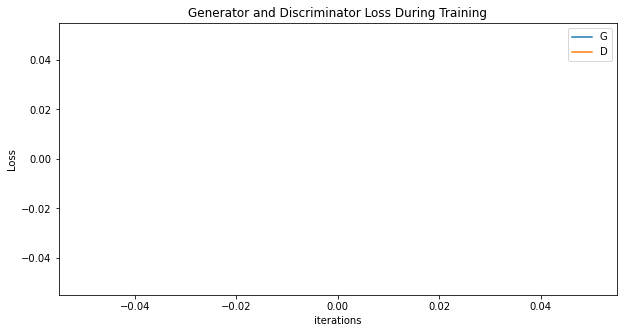

In [11]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

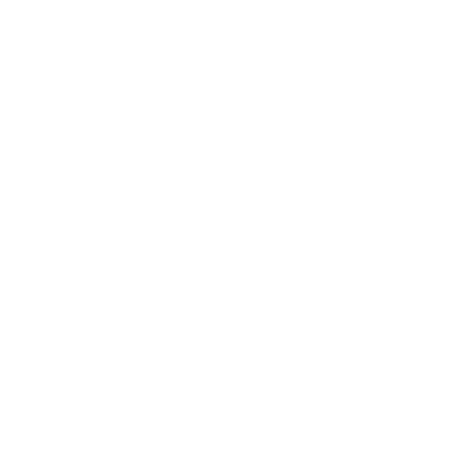

In [12]:
#%%capture
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

IndexError: list index out of range

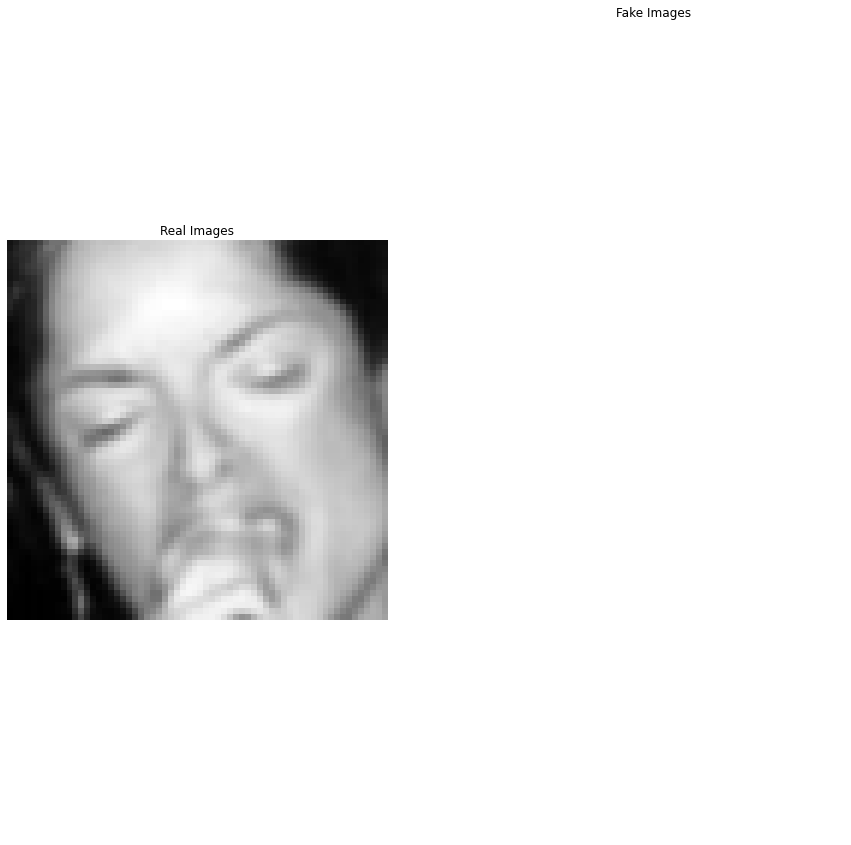

In [13]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()